In [13]:
pwd

'C:\\Users\\SMART-01\\python_ldg\\session1'

###numpy예제

In [15]:
#numpy 라이브러리 불러오기
import numpy as np

In [18]:
np.loadtxt('../dataset/testNumpy.txt',
          delimiter = ',')

array([[1., 2., 3.],
       [4., 5., 6.]])

In [5]:
import pandas_datareader.data as web
import fix_yahoo_finance as yf
yf.pdr_override()
from datetime import date, timedelta
import matplotlib.pyplot as pit
import datetime

start = datetime.datetime(2017,4,1)
end = date.today()

SEC = web.get_data_yahoo("005930.KS", start, end)
SEC.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-03,41400.0,41720.0,41300.0,41440.0,10779.122070,9579400
2017-04-04,41600.0,42180.0,41520.0,42080.0,10945.595703,12255500
2017-04-05,41900.0,42240.0,41700.0,42140.0,10961.202148,10699700
2017-04-06,42000.0,42080.0,41600.0,41840.0,10883.167969,9683400
2017-04-07,41800.0,41820.0,41160.0,41600.0,10820.740234,10021000


In [2]:
import urllib.parse
import pandas as pd

MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df


kosdaq_stocks = download_stock_codes('kospi')
kosdaq_stocks.head()
kosdaq_stocks.to_csv("d:/kospi.csv", index=False, encoding="utf-8-sig")
#encoding="utf-8-sig"
type(kosdaq_stocks)
kosdaq_stocks.head(5)


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ렌터카,068400,운송장비 임대업,승용자동차 임대,2012-07-27,12월,홍성관,http://www.ajrentacar.co.kr,서울특별시
1,E1,017940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,구자용 사장,http://www.e1.co.kr,서울특별시
2,GKL,114090,유원지 및 기타 오락관련 서비스업,카지노,2009-11-19,12월,이기우,http://www.grandkorea.com,서울특별시
3,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,"성상용, 서정민 (각자 대표이사)",http://www.krmotors.com,경상남도
4,LG화학,051910,기초 화학물질 제조업,"유화/기능/합성수지,재생섬유소,산업재,리튬이온전지,평광판,PVC 제조,도매",2001-04-25,12월,박진수,http://www.lgchem.com,서울특별시


In [1]:
import matplotlib.pyplot as pit

In [2]:
%matplotlib inline

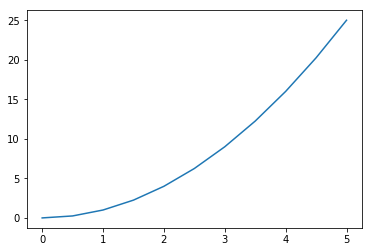

In [3]:
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2
pit.plot(x,y)

[*********************100%***********************]  1 of 1 downloaded


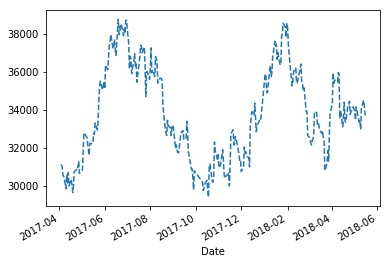

In [4]:
import pandas_datareader.data as web
import fix_yahoo_finance as yf
yf.pdr_override()
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

start = datetime.datetime(2017,4,1)
end = date.today()

SEC = web.get_data_yahoo("003490.KS", start, end)
SEC['Close'].plot(style='--')
plt.show()

   SEPALLENGTH  SEPALWIDTH  PETALLENGTH  PETALWIDTH SPECIES
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa


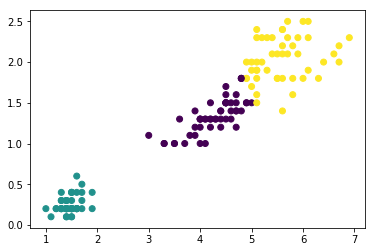

In [14]:
# pandas 패키지 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#CSV 파일을 읽어 DATA Frame 변수에 저장하기
flowerData = pd.read_csv("../dataset/IRIS.csv")
print(flowerData.head(2))

name = flowerData[ ['SPECIES']]
feature = flowerData[['PETALLENGTH','PETALWIDTH']]

#create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['PREDICT']


#conatenate labels to df as a new column
r = pd.concat([name,feature,predict],axis=1)

#scatter plot
plt.scatter(r['PETALLENGTH'],r['PETALWIDTH'],c=r['PREDICT'],alpha=1)

#pit.scatter(center_x,center_y,s=50,marker='0',c='r')
plt.show()

